# 1. Load the Dataset (Housing)


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**Columns Description:**  
**CRIM:** per capita crime rate by town

**ZN:** proportion of residential land zoned for lots over 25,000 sq.ft.

**INDUS:** proportion of non-retail business acres per town

**CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

**NOX:** nitric oxides concentration (parts per 10 million)

**RM:** average number of rooms per dwelling

**AGE:** proportion of owner-occupied units built before 1940

**DIS:** weighted distances to five Boston employment centres

**RAD:** index of accessibility to radial highways

**TAX:** full-value property-tax rate per $10,000

**PTRATIO:** pupil-teacher ratio by town

**B:** 1000(Bk - 0.63)² where Bk is the proportion of Black residents by town

**LSTAT:** % lower status of the population

**MEDV:** Median value of owner-occupied homes in $1000's (target)

In [32]:
data_url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data"

columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
           'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

housing = pd.read_csv(data_url, delim_whitespace=True, names=columns)
housing

/tmp/ipython-input-3090255200.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  housing = pd.read_csv(data_url, delim_whitespace=True, names=columns)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [33]:
housing.shape

(506, 14)

In [34]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


**Key Point:** In this dataset, there is no missing values and all the values are numeric, so no need to do feature scaling.

In [35]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [36]:
housing['RAD'].value_counts()

,count
RAD,
24,132
5,115
4,110
3,38
6,26
8,24
2,24
1,20
7,17


In [37]:
housing['RM']

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147
...,...
501,6.593
502,6.120
503,6.976
504,6.794


##Detecting Outliers

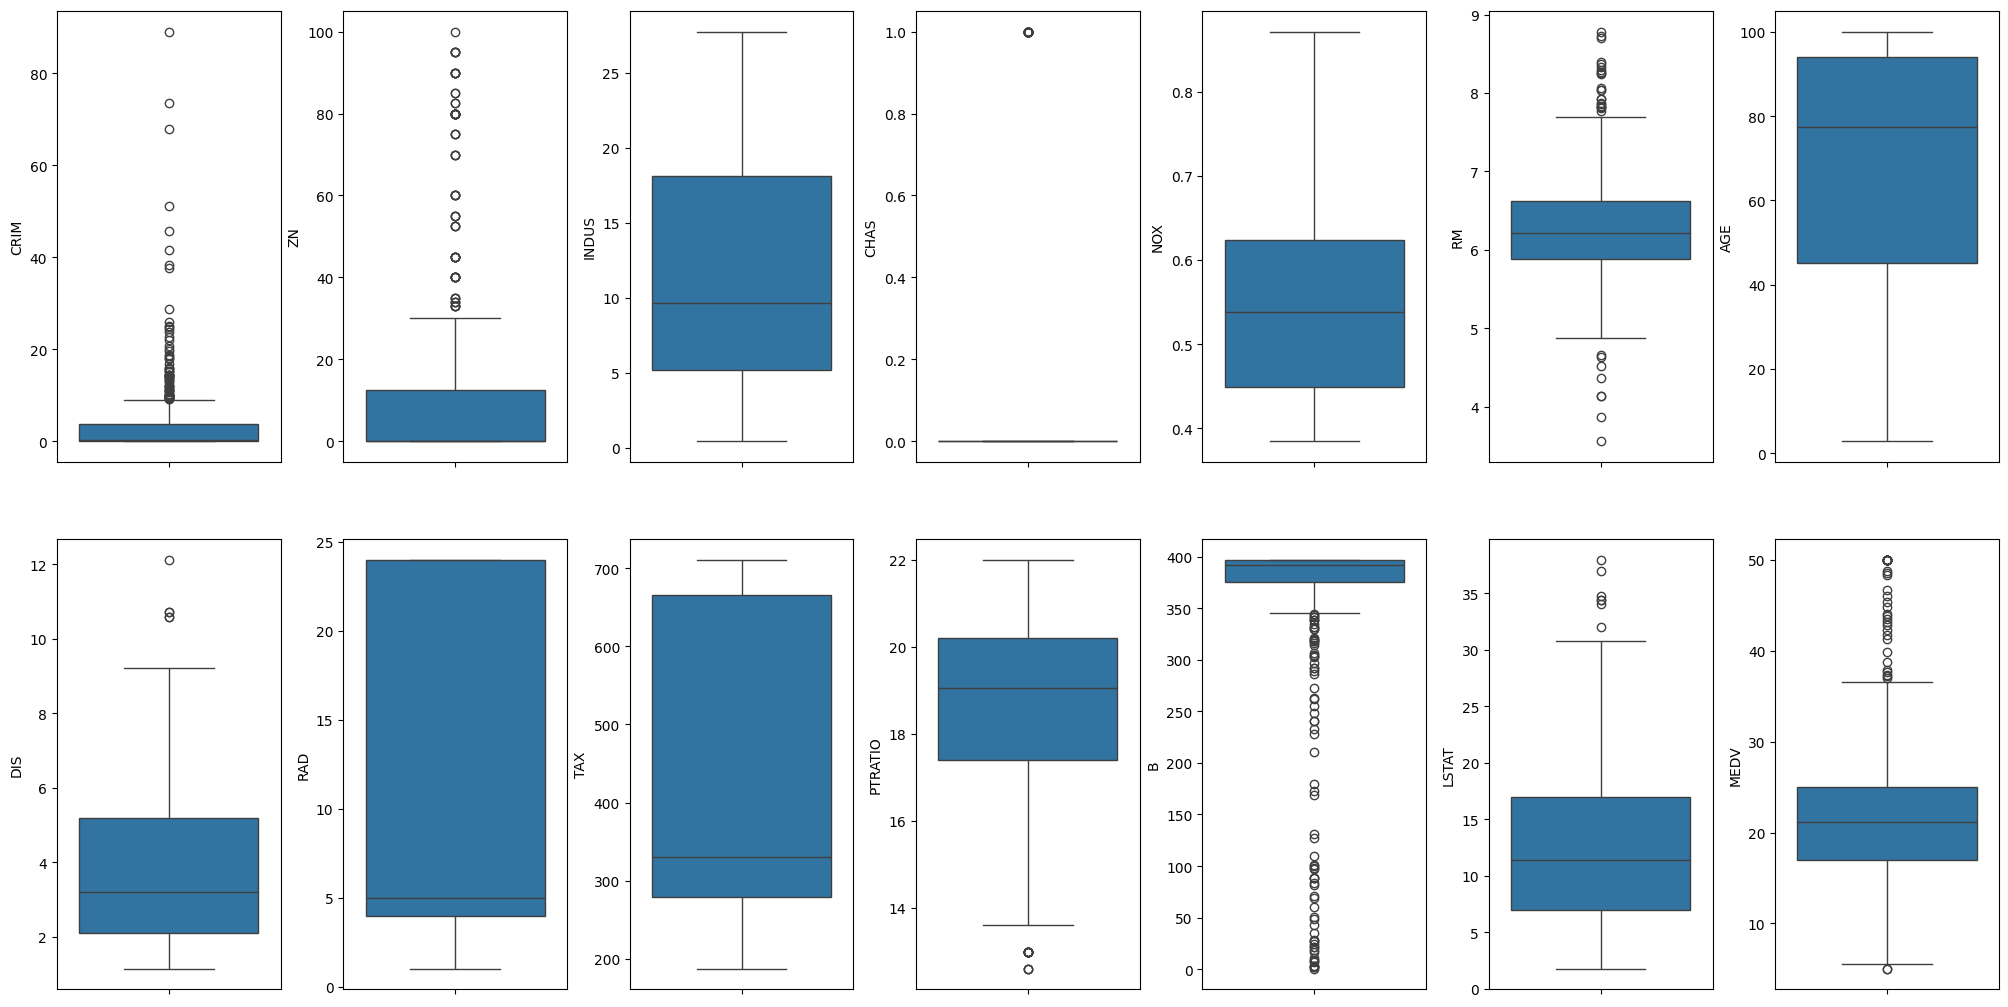

In [44]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index=0
axs = axs.flatten()
for k,v in housing.items():
  sns.boxplot(y=k, data=housing, ax=axs[index])
  index+=1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

**Key Note:**  Columns like CRIM, ZN, RM, B and MEDV seems to have heavily outliers.

In [45]:
for k, v in housing.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(housing)[0]
  print('Column %s outliers = %.2f%%' % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


**Removing rows with MEDV=50.0 since they are artificially capped and distort the model.**

In [46]:
housing = housing[~(housing['MEDV'] >= 50.0)]
print(np.shape(housing))

(490, 14)


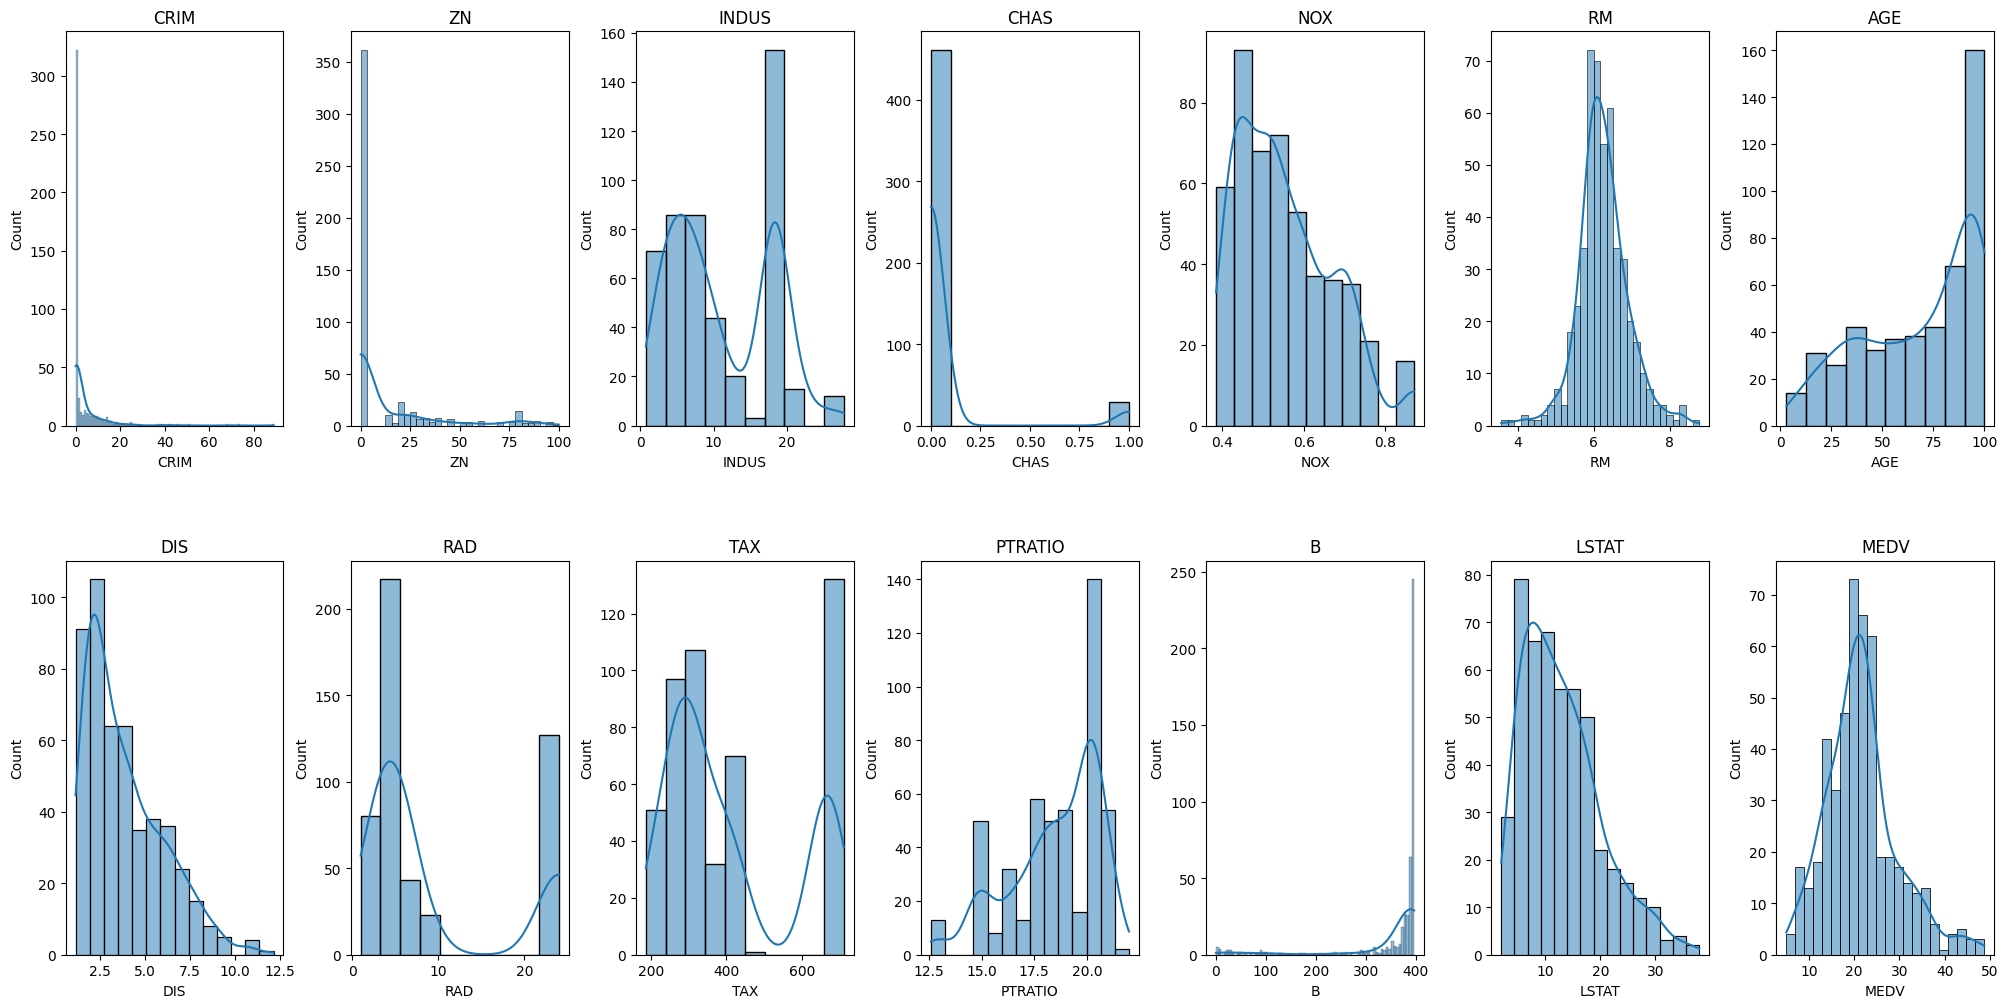

In [54]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
axs = axs.flatten()

for index, (k, v) in enumerate(housing.items()):
    sns.histplot(v, ax=axs[index], kde=True)
    axs[index].set_title(k)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5)
plt.show()


**Key Note:** The histogram also shows that columns CRIM, ZN, B has highly skewed distributions. Also MEDV looks to have a normal distribution (the predictions) and other colums seem to have norma or bimodel ditribution of data except CHAS (which is a discrete variable).

# Exploratory Data Analysis (EDA)

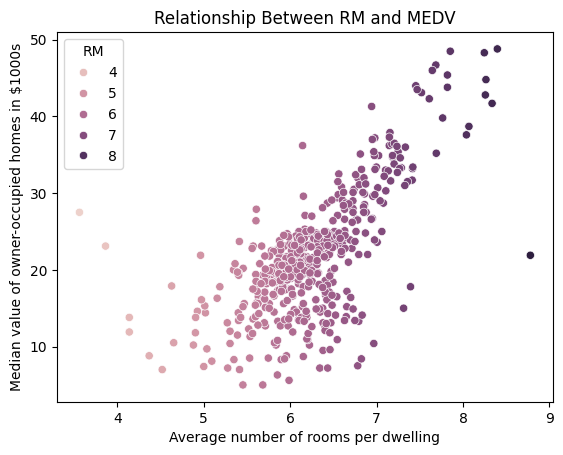

In [55]:
sns.scatterplot(x='RM', y='MEDV', data=housing, hue='RM')
plt.title('Relationship Between RM and MEDV')
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Median value of owner-occupied homes in $1000s')
plt.show()

**Key Point:** In this plot it's clearly to see a linear pattern. More average number of rooms per dowelling, more expensive the median value is.

In [56]:
display(housing.corr()['MEDV'].sort_values(ascending=False))

,MEDV
MEDV,1.000000
RM,0.686634
ZN,0.404608
DIS,0.368813
B,0.364928
CHAS,0.074803
CRIM,-0.450115
RAD,-0.476296
AGE,-0.492915
PTRATIO,-0.518641


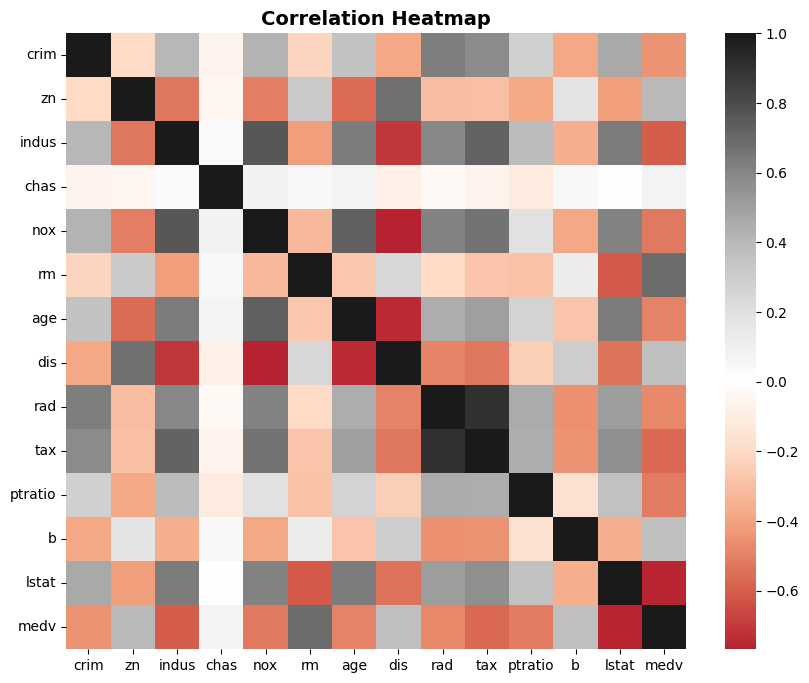

In [57]:
plt.figure(figsize=(10, 8))
corr = housing.corr()

corr.index = corr.columns.str.lower()
corr.columns = corr.columns.str.lower()

sns.heatmap(corr, cmap='RdGy', center=0)
plt.title('Correlation Heatmap', fontsize=14, weight='bold')
plt.yticks(rotation=0)
plt.show()

**Key Point:** House prices (MEDV) increase with more rooms (RM) and better residential zoning (ZN), but decrease sharply with higher % of lower-status population (LSTAT), higher pupil–teacher ratio (PTRATIO), more industry (INDUS), pollution (NOX), crime (CRIM), taxes (TAX), and poor highway/older housing conditions (RAD, AGE).

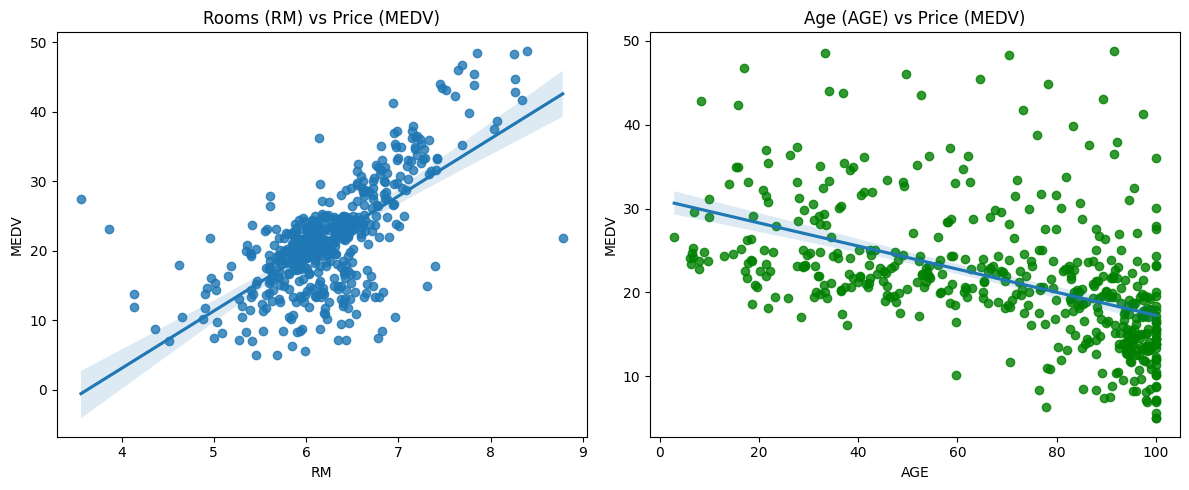

In [58]:
fix, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.regplot(data=housing, x='RM', y='MEDV', ax=axes[0])
axes[0].set_title('Rooms (RM) vs Price (MEDV)')

sns.regplot(data=housing, x='AGE', y='MEDV', ax=axes[1], scatter_kws={'color':'green'})
axes[1].set_title('Age (AGE) vs Price (MEDV)')

plt.tight_layout()
plt.show()

**Key Note:**  
RM: upward trend (more rooms → higher price)

AGE: downward/flat trend (older house → lower price)

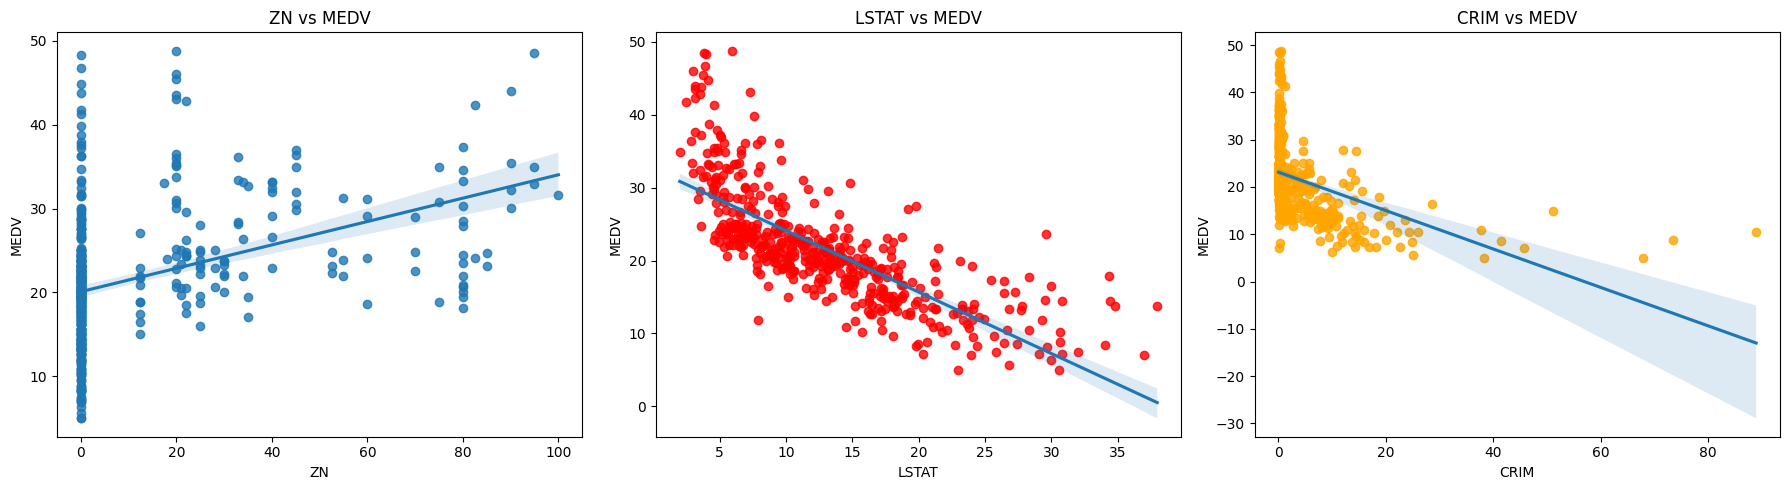

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.regplot(data=housing, x='ZN', y='MEDV', ax=axes[0], scatter_kws={'alpha':0.8})
axes[0].set_title('ZN vs MEDV')

sns.regplot(data=housing, x='LSTAT', y='MEDV', ax=axes[1], scatter_kws={'alpha':0.8, 'color':'red'})
axes[1].set_title('LSTAT vs MEDV')

sns.regplot(data=housing, x='CRIM', y='MEDV', ax=axes[2], scatter_kws={'alpha':0.8, 'color': 'orange'})
axes[2].set_title('CRIM vs MEDV')

plt.tight_layout()
plt.show()

**Key Note:**  
* ZN (Zoning): Areas with more residential land zoning tend to have slightly higher house prices.

* LSTAT (Lower-status %): Strongest driver — higher % of lower-status population → sharp drop in house prices.

* CRIM (Crime rate): Higher crime → lower property values, though effect is strongest at low-to-moderate crime levels.     

Takeaway: Social and environmental factors (LSTAT, CRIM) matter more than zoning (ZN) when predicting housing prices.

# 2. Split the Dataset

In [60]:
x = housing.drop('MEDV', axis=1)
y = housing['MEDV']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Implementing Polynomial Features due to having lower accuracy**

In [61]:
poly = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [62]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_poly)
x_test_scaled = scaler.transform(x_test_poly)

# 3. Train Models

In [63]:
lin_reg = LinearRegression()
lin_reg.fit(x_train_scaled, y_train)
y_lin_pred = lin_reg.predict(x_test_scaled)

ridge_reg = Ridge(alpha=10)
ridge_reg.fit(x_train_scaled, y_train)
y_ridge_pred = ridge_reg.predict(x_test_scaled)

lasso_reg = Lasso(alpha=0.5)
lasso_reg.fit(x_train_scaled, y_train)
y_lasso_pred = lasso_reg.predict(x_test_scaled)

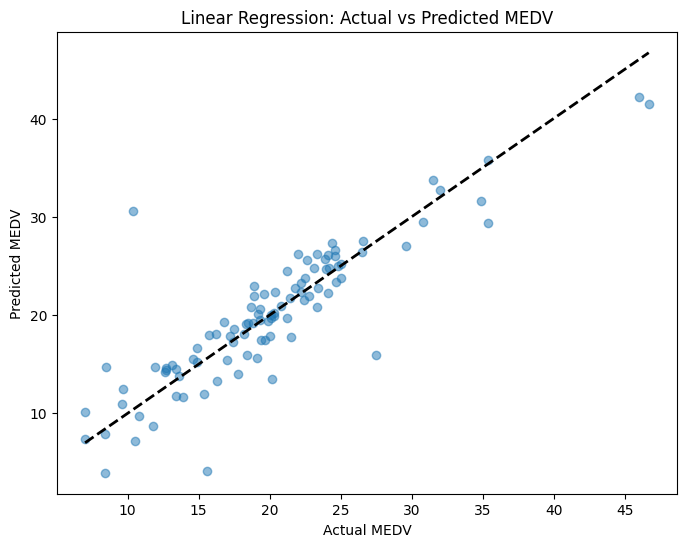

In [64]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_lin_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Linear Regression: Actual vs Predicted MEDV")
plt.show()

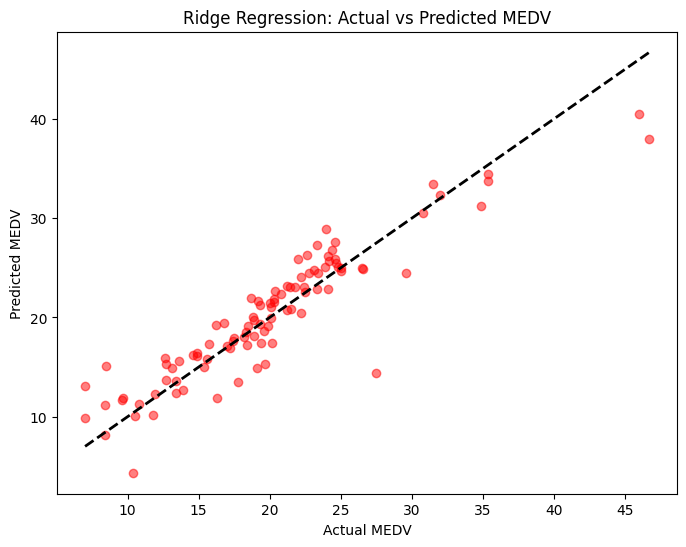

In [65]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_ridge_pred, alpha=0.5, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Ridge Regression: Actual vs Predicted MEDV")
plt.show()

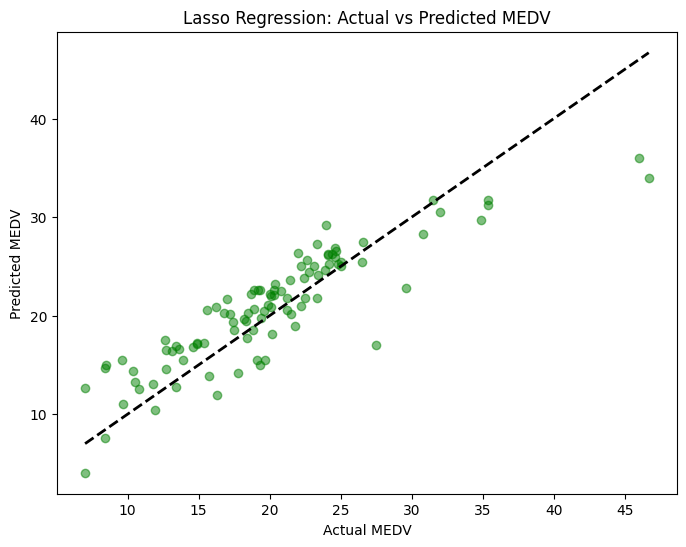

In [66]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_lasso_pred, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Lasso Regression: Actual vs Predicted MEDV")
plt.show()

#4. Models Evaluatoin

In [67]:
mae = mean_absolute_error(y_test, y_lin_pred)
mse = mean_squared_error(y_test, y_lin_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_lin_pred)

Linear = [mae, mse, rmse, r2]

print('Linear Regression Metrics:')
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2 Score:', r2)

Linear Regression Metrics:
MAE: 2.2293298465633775
MSE: 12.164530993988407
RMSE: 3.487768770143515
R2 Score: 0.7618783214146664


In [68]:
mae = mean_absolute_error(y_test, y_ridge_pred)
mse = mean_squared_error(y_test, y_ridge_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_ridge_pred)

Ridge = [mae, mse, rmse, r2]

print('Ridge Regression Metrics:')
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2 Score:', r2)

Ridge Regression Metrics:
MAE: 1.9857250664529054
MSE: 7.931756222140271
RMSE: 2.8163373771869504
R2 Score: 0.8447352300981358


In [69]:
mae = mean_absolute_error(y_test, y_lasso_pred)
mse = mean_squared_error(y_test, y_lasso_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_lasso_pred)

Lasso = [mae, mse, rmse, r2]

print('Lasso Regression Metrics:')
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2 Score:', r2)

Lasso Regression Metrics:
MAE: 2.7150540268016057
MSE: 12.01025151040447
RMSE: 3.4655809773260917
R2 Score: 0.7648983547904242


In [70]:
print("Linear Regression Accuracy: {:.2f}%".format(Linear[3] * 100))
print("Ridge Regression Accuracy:  {:.2f}%".format(Ridge[3] * 100))
print("Lasso Regression Accuracy:  {:.2f}%".format(Lasso[3] * 100))

Linear Regression Accuracy: 76.19%
Ridge Regression Accuracy:  84.47%
Lasso Regression Accuracy:  76.49%


In [71]:
pd.DataFrame({'Linear Regression': Linear, 'Ridge Regression': Ridge, 'Lasso Regression': Lasso}, index=['MAE', 'MSE', 'RMSE', 'R2 Score'])

,Linear Regression,Ridge Regression,Lasso Regression
MAE,2.229330,1.985725,2.715054
MSE,12.164531,7.931756,12.010252
RMSE,3.487769,2.816337,3.465581
R2 Score,0.761878,0.844735,0.764898


**Bottom Line:** Ridge Regression outperformed Linear and Lasso, achieving the best accuracy (R² ≈ 84.5%), proving that regularization helps reduce error and improves housing price prediction.

In [73]:
comparison = pd.DataFrame({
    "Actual": y_test.reset_index(drop=True),
    "Predicted": y_ridge_pred.flatten()
})

print(comparison)

    Actual  Predicted
0     19.1  14.932383
1     23.9  25.106272
2     13.4  13.555379
3      7.0  13.114109
4     10.8  11.322509
..     ...        ...
93    19.3  21.283246
94     9.7  11.921609
95    24.7  25.542353
96    20.1  21.052401
97     7.0   9.856084

[98 rows x 2 columns]
